
# Title Here

Author: Kim Hummel

GitHub Repository Link: https://github.com/kehummel/datafun-07-ml 



In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy


## Part 1 - Chart a Straight Line

Create a lambda for the formula for changing fahrenheit to celcius and then define the range that we want shown. 

In [41]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

We'll turn our data into a data frame so that we can plot it using pandas. 

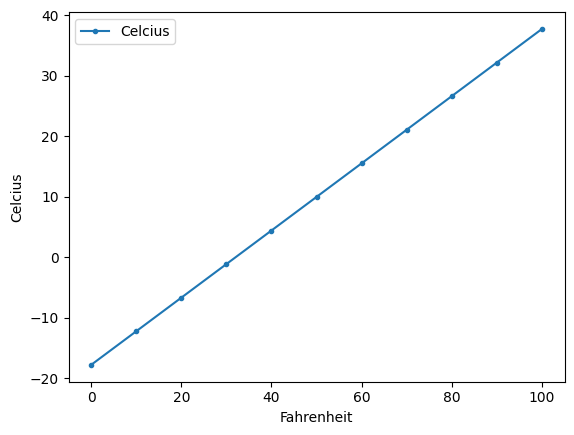

In [42]:
temps_df= pd.DataFrame(temps, columns=['Fahrenheit', 'Celcius'])

axes = temps_df.plot(x='Fahrenheit', y='Celcius', style='.-')

y_label = axes.set_ylabel('Celcius')

This graph shows the conversion between Fahrenheit and Celcius. Any spot on the line show the cooresponding temperatures in Fahrenheit and Celcius. 

# Part 2 - Prediction 

Section 1 - Data Acquisition 

Load the NYC January Highest Temperature data into a data frame.

In [43]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

Section 2 - Data Inspection

View the head and tail of the file. 

In [44]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [45]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


Section 3 - Data Cleaning 

Change column titles, turn values into integers, and turn the date into years only. 

In [46]:
# Change column name "Value" to "Temperature"
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [47]:
# Change Dates into integers 
nyc['Date'] = nyc['Date'].astype('int64')

In [48]:
# Get rid of the last two digits in the year column by dividing by 100

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Section 4 - Descriptive Statistics 

Show a basic description of the data 

In [49]:
# rounding displayed numbers to 2 decimal places 
pd.set_option('display.precision', 2)

# Basic statistics of the Temperature data 
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Section 5 - Build the Model

Build the linear regression model in order to be able to make predictions. 

In [52]:
# Start Linear Regression Calculations

from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [53]:
# Calculate slope 

linear_regression.slope

np.float64(0.014771361132966163)

In [54]:
# Calcuate y-intercept
linear_regression.intercept

np.float64(8.694993233674289)

Section 6 - Predict

Predict the average high temperature in January for the year 2024

In [55]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

The predicted average high temperature in January 2024 is 38.6 degrees Fahrenheit.

Section 7 - Visualizations

Scatter plot with a line of best fit. 

(10.0, 70.0)

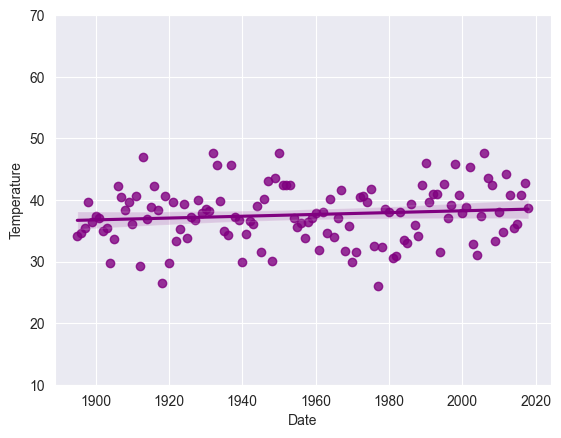

In [61]:
sns.set_style('darkgrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature, color='purple')

axes.set_ylim(10,70)

# Part 3 - Prediction 
Linear Regression: Training the model, Testing the model, and predicting with the model

In [62]:
# Split the data into training and testing sets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

We need to confirm the 75% - 25% train-test split. So we'll use shape to see how many data points are in the train and test sections, and they should add up to 124, which was our count() output back in Part 2 Secion 4

In [63]:
X_train.shape

(93, 1)

In [64]:
X_test.shape

(31, 1)

In [65]:
93 + 31

124

Now we train the data using linear regression fit

In [66]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


View the coefficient and y - intercept

In [67]:
# Coefficient
linear_regression.coef_

array([0.01939167])

In [68]:
# y-intercept
linear_regression.intercept_

np.float64(-0.30779820252656975)

Section 2 - Testing the Model 

In [69]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


Section 3 - Predict
Predict the average high temperature for January 2024

In [70]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

predict(2024)

array([38.94094855])

It is predicted that in NYC, the average high temperature in January will be 38.9 degrees Fahrenhiet. 

Section 4 - Visualization 

Create a scatter plot with the best line of fit

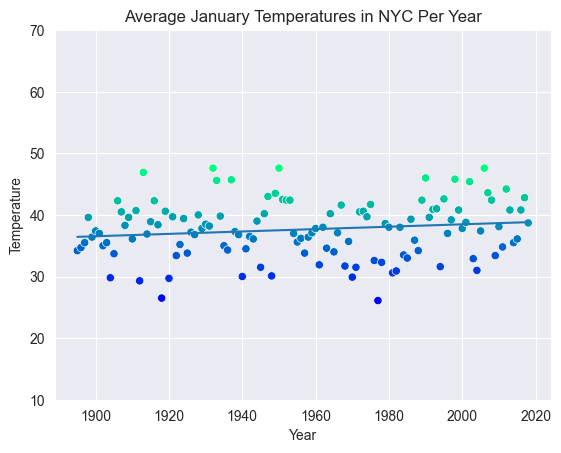

In [73]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

axes.set_title('Average January Temperatures in NYC Per Year')
axes.set_xlabel('Year')

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

# Part 4 - Insights

Honestly, both methods felt very similar.

In the first method, there is less code to write so it does feel a little bit more straight forward. However, I could see how the automation part of the second process could make it easier when working with large sets of data or looking to complete more complex analysis. 

# Part 5 - Bonus 

Section 1 - Loading the Data 

In [74]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

Section 2 - Displaying the Data

In [75]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [78]:
#bnumber of rows, columns
california.data.shape

(20640, 8)

In [79]:
# Number of Median house values
california.target.shape

(20640,)

In [80]:
# Column Names
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']